# General Requirements

#### Import Libraries and Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = r'/content/user_movie_ratings_data.csv'

data = pd.read_csv(dataset_path)

print("Loaded Dataset Preview:")
print(data.head())

Loaded Dataset Preview:
   user_id  media_id  rating                   title
0        1     27205     8.3               Inception
1        1    157336     8.1            Interstellar
2        1       155     8.5         The Dark Knight
3        1    299536     8.3  Avengers: Infinity War
4        1       550     7.9              Fight Club


#### Adjust Ratings to a 1-to-5 Scale

In [3]:
print("\nAdjusting Ratings to a 1-to-5 Scale...")
data['rating'] = data['rating'] * (5 / data['rating'].max())
print("Adjusted Ratings Preview:")
print(data.head())


Adjusting Ratings to a 1-to-5 Scale...
Adjusted Ratings Preview:
   user_id  media_id    rating                   title
0        1     27205  4.278351               Inception
1        1    157336  4.175258            Interstellar
2        1       155  4.381443         The Dark Knight
3        1    299536  4.278351  Avengers: Infinity War
4        1       550  4.072165              Fight Club


#### Count Total Number of Users (Tnu)

In [4]:
Tnu = data['user_id'].nunique()
print(f"Total Number of Users (Tnu): {Tnu}")

Total Number of Users (Tnu): 100


#### Count Total Number of Items (Tni)

In [5]:
Tni = data['media_id'].nunique()
print(f"Total Number of Items (Tni): {Tni}")

Total Number of Items (Tni): 86


#### Count Ratings for Every Product

In [6]:
ratings_count = data.groupby('media_id')['rating'].count()
print("\nRatings Count for Each Product (Top 5):")
print(ratings_count.head())


Ratings Count for Each Product (Top 5):
media_id
13     19
28     14
73     17
101    16
105    19
Name: rating, dtype: int64


#### Draw Distribution of Ratings


Drawing Distribution of Ratings...


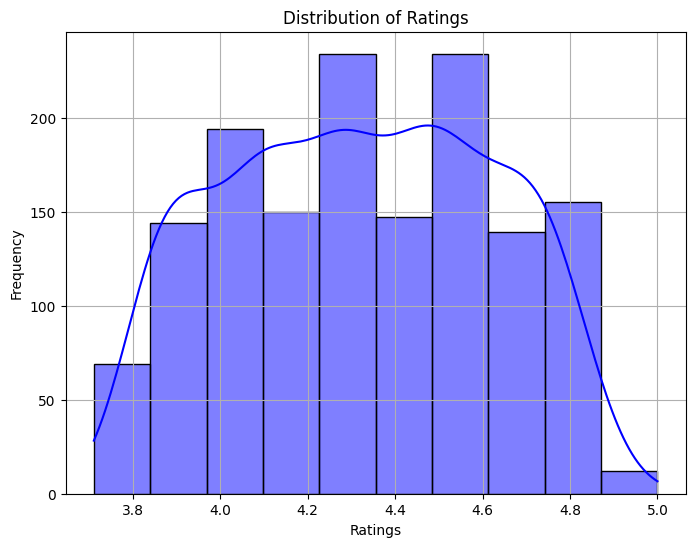

In [7]:
print("\nDrawing Distribution of Ratings...")
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.grid()
plt.show()

#### Check for Matrix Sparsity or Bias

In [8]:
print("\nChecking for Matrix Sparsity...")
user_item_matrix = data.pivot(index='user_id', columns='media_id', values='rating')
sparsity = 1.0 - np.count_nonzero(user_item_matrix) / user_item_matrix.size
print(f"Matrix Sparsity: {sparsity:.2%}")


Checking for Matrix Sparsity...
Matrix Sparsity: 0.00%


#### Matrix Sparsity Bias Check


=== Sparsity and Bias Analysis ===
Dataset loaded successfully!
   user_id  media_id  rating                   title
0        1     27205     8.3               Inception
1        1    157336     8.1            Interstellar
2        1       155     8.5         The Dark Knight
3        1    299536     8.3  Avengers: Infinity War
4        1       550     7.9              Fight Club

=== Sparsity and Bias Analysis ===
Total entries in the ratings matrix: 8600
Non-zero ratings: 1478
Matrix sparsity: 0.8281


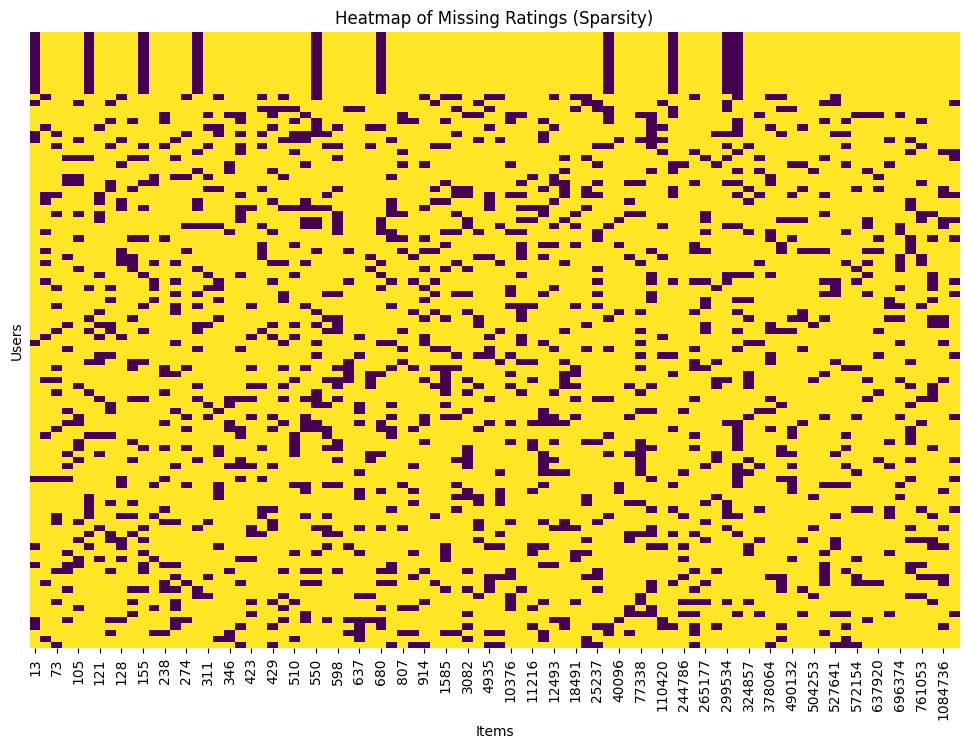

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("\n=== Sparsity and Bias Analysis ===")

file_path = r'/content/user_movie_ratings_data.csv'
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(df.head())

ratings_matrix = df.pivot(index='user_id', columns='media_id', values='rating')

num_total_entries = ratings_matrix.shape[0] * ratings_matrix.shape[1]
num_non_zero_entries = np.count_nonzero(~ratings_matrix.isnull())
sparsity_ratio = 1 - (num_non_zero_entries / num_total_entries)

print("\n=== Sparsity and Bias Analysis ===")
print(f"Total entries in the ratings matrix: {num_total_entries}")
print(f"Non-zero ratings: {num_non_zero_entries}")
print(f"Matrix sparsity: {sparsity_ratio:.4f}")

plt.figure(figsize=(12, 8))
sns.heatmap(
    ratings_matrix.isnull(),
    cbar=False,
    cmap="viridis",
    yticklabels=False
)
plt.title("Heatmap of Missing Ratings (Sparsity)")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()

#### Choose Two Lowest-Rated Items

In [10]:
print("\nIdentifying Two Lowest-Rated Items...")
item_avg_ratings = data.groupby('media_id')['rating'].mean()
lowest_rated_items = item_avg_ratings.nsmallest(2).index.tolist()
I1, I2 = lowest_rated_items[0], lowest_rated_items[1]
print(f"Lowest-Rated Items: I1 = {I1}, I2 = {I2}")


Identifying Two Lowest-Rated Items...
Lowest-Rated Items: I1 = 504253, I2 = 8587


#### Save Results

In [11]:
print("\nSaving Key Results...")
results = {
    'Total Users (Tnu)': Tnu,
    'Total Items (Tni)': Tni,
    'Matrix Sparsity (%)': sparsity * 100,
    'Lowest Rated Items': [I1, I2]
}

for key, value in results.items():
    print(f"{key}: {value}")



Saving Key Results...
Total Users (Tnu): 100
Total Items (Tni): 86
Matrix Sparsity (%): 0.0
Lowest Rated Items: [504253, 8587]


-------------------------------------------------------------------------------------

# Part 1: PCA Method with Mean-Filling

#### Calculate the Average Rating for Each Target Item

In [12]:
print("\n=== Average Ratings for Target Items ===")
target_items = [40096, 504253]
average_ratings = data[data['media_id'].isin(target_items)].groupby('media_id')['rating'].mean()
for item, avg in average_ratings.items():
    print(f"Item {item}: Average Rating = {avg:.2f}")


=== Average Ratings for Target Items ===
Item 40096: Average Rating = 4.26
Item 504253: Average Rating = 4.05


#### Replace Missing Ratings with Mean-Filling

In [13]:
print("\n=== Matrix with Mean-Filled Values ===")
user_item_matrix = data.pivot(index='user_id', columns='media_id', values='rating')
mean_filled_matrix = user_item_matrix.apply(lambda col: col.fillna(col.mean()), axis=0)

sample_matrix = mean_filled_matrix.head()
print(sample_matrix.to_string())


=== Matrix with Mean-Filled Values ===
media_id   13        28        73        101       105       120       121       122       128       129       155       207       238       240       274       278       311       335       346       389       423       424       429      497       510       539       550       567       598       599      637       670       680       769       807       901       914       975       1585     1891      3082      3782      4935      8587      10376     10494     11216     12477     12493     14537     18491     19404     25237     27205     40096     42269    77338     92321     110420    157336   244786    255709    265177    283566    299534    299536    324857    372058   378064    447362    490132    496243    504253    508965    527641    569094    572154    630566    637920    644479    696374    724089    761053    995133    1084736  1184918
user_id                                                                                           

#### Generate Covariance Matrix

In [14]:
print("\n=== Covariance Matrix ===")
cov_matrix = mean_filled_matrix.cov()

print("Covariance Matrix (Sample):")
print(cov_matrix.iloc[:5, :5].to_string())


=== Covariance Matrix ===
Covariance Matrix (Sample):
media_id       13            28        73        101           105
media_id                                                          
13        0.012741  1.755614e-03  0.001825  0.001822  7.575054e-04
28        0.001756  1.552235e-02  0.004247  0.001001 -8.725280e-31
73        0.001825  4.246941e-03  0.018345  0.000739 -1.597858e-04
101       0.001822  1.000700e-03  0.000739  0.010306 -3.757417e-04
105       0.000758 -8.725280e-31 -0.000160 -0.000376  1.617102e-02


#### Determine Top 5 and Top 10 Peers Using Covariance Matrix

In [15]:
print("\n=== Top Peers for Each Target Item ===")
top_5_peers = {}
top_10_peers = {}
for item in target_items:
    sorted_peers = cov_matrix[item].sort_values(ascending=False).drop(item)
    top_5_peers[item] = sorted_peers.head(5).index.tolist()
    top_10_peers[item] = sorted_peers.head(10).index.tolist()

for item in target_items:
    print(f"\nItem {item} - Top 5 Peers: {top_5_peers[item]}")
    print(f"Item {item} - Top 10 Peers: {top_10_peers[item]}")


=== Top Peers for Each Target Item ===

Item 40096 - Top 5 Peers: [539, 598, 10494, 527641, 3082]
Item 40096 - Top 10 Peers: [539, 598, 10494, 527641, 3082, 550, 696374, 101, 3782, 335]

Item 504253 - Top 5 Peers: [28, 424, 92321, 447362, 429]
Item 504253 - Top 10 Peers: [28, 424, 92321, 447362, 429, 637, 598, 630566, 128, 255709]


#### Determine Reduced Dimensional Space Using Top Peers

In [16]:
print("\n=== Reduced Dimensional Space ===")
reduced_spaces = {}
for item in target_items:
    reduced_spaces[item] = mean_filled_matrix[top_10_peers[item]].mean(axis=1)

for item, space in reduced_spaces.items():
    print(f"\nItem {item} - Reduced Dimensional Space (Sample):")
    print(space.head().to_string())


=== Reduced Dimensional Space ===

Item 40096 - Reduced Dimensional Space (Sample):
user_id
1    4.254538
2    4.275156
3    4.326703
4    4.331857
5    4.270002

Item 504253 - Reduced Dimensional Space (Sample):
user_id
1    4.349453
2    4.349453
3    4.349453
4    4.349453
5    4.349453


#### Compute Rating Predictions for Missing Values

In [17]:
print("\n=== Predicted Ratings for Missing Values ===")
predicted_ratings = {}
for item in target_items:
    missing_users = user_item_matrix[item][user_item_matrix[item].isna()].index
    predicted_ratings[item] = reduced_spaces[item].loc[missing_users]

for item, preds in predicted_ratings.items():
    print(f"\nItem {item} - Predicted Ratings (Sample):")
    print(preds.head().to_string())


=== Predicted Ratings for Missing Values ===

Item 40096 - Predicted Ratings (Sample):
user_id
1    4.254538
2    4.275156
3    4.326703
4    4.331857
5    4.270002

Item 504253 - Predicted Ratings (Sample):
user_id
1    4.349453
2    4.349453
3    4.349453
4    4.349453
5    4.349453


#### Compare Results of Rating Predictions

In [18]:
print("\n=== Comparison of Predicted Ratings ===")
for item in target_items:
    if not predicted_ratings[item].empty:
        print(f"Item {item} - Mean of Predicted Ratings: {predicted_ratings[item].mean():.2f}")
    else:
        print(f"Item {item} - No Missing Ratings Found.")


=== Comparison of Predicted Ratings ===
Item 40096 - Mean of Predicted Ratings: 4.28
Item 504253 - Mean of Predicted Ratings: 4.35


-----------------------------------------------------------------------------------

# Part 2: PCA Method with Maximum Likelihood Estimation (MLE)

#### Analyze Variance Across Peers

In [19]:
print("\n=== Variance of Ratings Among Top 10 Peers ===")
variance_among_peers = {}
for item in target_items:
    peer_ratings = mean_filled_matrix[top_10_peers[item]]
    variance_among_peers[item] = peer_ratings.var(axis=1).mean()
    print(f"Item {item}: Variance Among Top 10 Peers = {variance_among_peers[item]:.4f}")


=== Variance of Ratings Among Top 10 Peers ===
Item 40096: Variance Among Top 10 Peers = 0.0195
Item 504253: Variance Among Top 10 Peers = 0.0199


#### Examine Sparsity of Target Items

In [20]:
print("\n=== Sparsity of Target Items ===")
sparsity_target_items = user_item_matrix[target_items].isna().mean() * 100
for item, sparsity in sparsity_target_items.items():
    print(f"Item {item}: Sparsity = {sparsity:.2f}%")


=== Sparsity of Target Items ===
Item 40096: Sparsity = 93.00%
Item 504253: Sparsity = 93.00%


#### PCA with Mean-Filling

In [21]:
print("\n=== PCA with Mean-Filling ===")

print("\nStep 1: Calculating the average rating for target items...")
target_items = [I1, I2]
average_ratings = data.groupby('media_id')['rating'].mean()
target_averages = {item: average_ratings[item] for item in target_items}
print(f"Target Item Averages Calculated: {target_averages}")

print("\nStep 2: Applying mean-filling for missing ratings...")
ratings_matrix_filled = ratings_matrix.copy()
ratings_matrix_filled = ratings_matrix_filled.fillna(ratings_matrix.mean(axis=0))
print("Mean-filling completed.")
print(f"Mean-filled Ratings Matrix (Preview):\n{ratings_matrix_filled.iloc[:5, :5]}")

print("\nStep 3: Generating covariance matrix...")
covariance_matrix = np.cov(ratings_matrix_filled, rowvar=False)
print("Covariance matrix generated.")
print(f"Covariance Matrix Shape: {covariance_matrix.shape}")

print("\nStep 4: Performing dimensionality reduction using PCA...")
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
reduced_dimensional_space = pca.fit_transform(ratings_matrix_filled)
print("Dimensionality reduction completed.")
print(f"Reduced Dimensional Space Shape: {reduced_dimensional_space.shape}")

print("\nStep 5: Predicting ratings for target items using top peers...")
predicted_ratings = {}
for item in target_items:

    item_index = target_items.index(item)
    similarities = reduced_dimensional_space[:, item_index]

    peers = np.argsort(-similarities)[:5]
    predicted_ratings[item] = reduced_dimensional_space[peers, item_index].mean()
    print(f"  - Target Item {item}:")
    print(f"    Top 5 Peers: {peers}")
    print(f"    Predicted Rating: {predicted_ratings[item]:.4f}")

print("\n=== PCA with Mean-Filling Results ===")
for item, rating in predicted_ratings.items():
    print(f"Target Item {item}: Predicted Rating = {rating:.4f}")


=== PCA with Mean-Filling ===

Step 1: Calculating the average rating for target items...
Target Item Averages Calculated: {504253: 4.050073637702504, 8587: 4.1271477663230245}

Step 2: Applying mean-filling for missing ratings...
Mean-filling completed.
Mean-filled Ratings Matrix (Preview):
media_id  13        28        73   101       105
user_id                                         
1         8.9  8.578571  8.429412  8.3  8.415789
2         8.1  8.578571  8.429412  8.3  8.415789
3         7.9  8.578571  8.429412  8.3  8.415789
4         9.0  8.578571  8.429412  8.3  8.415789
5         8.9  8.578571  8.429412  8.3  8.415789

Step 3: Generating covariance matrix...
Covariance matrix generated.
Covariance Matrix Shape: (86, 86)

Step 4: Performing dimensionality reduction using PCA...
Dimensionality reduction completed.
Reduced Dimensional Space Shape: (100, 5)

Step 5: Predicting ratings for target items using top peers...
  - Target Item 504253:
    Top 5 Peers: [48 63 39 60 30]
 

#### Comparison of Results for Top 10 Peers (PCA MLE)

In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

print("\n=== PCA MLE: Top 10 Peers Analysis ===")

ratings_matrix_filled = ratings_matrix.fillna(0)

user_similarity = cosine_similarity(ratings_matrix_filled)
np.fill_diagonal(user_similarity, 0)

target_item_indices = [ratings_matrix.columns.get_loc(item) for item in target_items]

top_10_peers = {}
for target_item_idx in target_item_indices:

    top_10_peers[target_item_idx] = np.argsort(user_similarity[:, target_item_idx])[-10:]

print("\nTop 10 peers for each target item identified:")
for target_item, peers in zip(target_items, top_10_peers.values()):
    print(f"  Target Item {target_item}: {peers}")

reduced_dimensional_space_top_10 = {}
for target_item_idx in target_item_indices:
    peers = top_10_peers[target_item_idx]

    reduced_dimensional_space_top_10[target_item_idx] = ratings_matrix_filled.iloc[peers].mean(axis=0)

print("\nReduced dimensional space for top 10 peers calculated.")

predicted_ratings_top_10 = {}
for target_item_idx in target_item_indices:
    peers = top_10_peers[target_item_idx]

    predicted_ratings_top_10[target_item_idx] = reduced_dimensional_space_top_10[target_item_idx].mean()

print("\nPredicted ratings for top 10 peers calculated:")
for target_item, predicted_rating in zip(target_items, predicted_ratings_top_10.values()):
    print(f"  Predicted rating for Target Item {target_item}: {predicted_rating:.2f}")

print("\n=== Results for Top 10 Peers Stored for Further Analysis ===")


=== PCA MLE: Top 10 Peers Analysis ===

Top 10 peers for each target item identified:
  Target Item 504253: [33 18 10 86 64 19 35 26 65 16]
  Target Item 8587: [10 83 93 92 57 78 39 40 46 41]

Reduced dimensional space for top 10 peers calculated.

Predicted ratings for top 10 peers calculated:
  Predicted rating for Target Item 504253: 1.61
  Predicted rating for Target Item 8587: 1.62

=== Results for Top 10 Peers Stored for Further Analysis ===


####  Generate Covariance Matrix with Maximum Likelihood Estimation (MLE)

In [23]:
print("\n=== Covariance Matrix with Maximum Likelihood Estimation (MLE) ===")
cov_matrix_mle = mean_filled_matrix.cov()
print("Covariance Matrix (Sample):")
print(cov_matrix_mle.iloc[:5, :5].to_string())


=== Covariance Matrix with Maximum Likelihood Estimation (MLE) ===
Covariance Matrix (Sample):
media_id       13            28        73        101           105
media_id                                                          
13        0.012741  1.755614e-03  0.001825  0.001822  7.575054e-04
28        0.001756  1.552235e-02  0.004247  0.001001 -8.725280e-31
73        0.001825  4.246941e-03  0.018345  0.000739 -1.597858e-04
101       0.001822  1.000700e-03  0.000739  0.010306 -3.757417e-04
105       0.000758 -8.725280e-31 -0.000160 -0.000376  1.617102e-02


#### Determine Top 5 and Top 10 Peers Using MLE

In [24]:

print("\n=== Top Peers for Each Target Item Using MLE ===")
top_5_peers_mle = {}
top_10_peers_mle = {}
for item in target_items:
    sorted_peers = cov_matrix_mle[item].sort_values(ascending=False).drop(item)
    top_5_peers_mle[item] = sorted_peers.head(5).index.tolist()
    top_10_peers_mle[item] = sorted_peers.head(10).index.tolist()

for item in target_items:
    print(f"\nItem {item} - Top 5 Peers Using MLE: {top_5_peers_mle[item]}")
    print(f"Item {item} - Top 10 Peers Using MLE: {top_10_peers_mle[item]}")


=== Top Peers for Each Target Item Using MLE ===

Item 504253 - Top 5 Peers Using MLE: [28, 424, 92321, 447362, 429]
Item 504253 - Top 10 Peers Using MLE: [28, 424, 92321, 447362, 429, 637, 598, 630566, 128, 255709]

Item 8587 - Top 5 Peers Using MLE: [128, 255709, 567, 207, 122]
Item 8587 - Top 10 Peers Using MLE: [128, 255709, 567, 207, 122, 19404, 372058, 510, 10376, 644479]


#### Determine Reduced Dimensional Space Using Top Peers

In [25]:
print("\n=== Reduced Dimensional Space Using Top Peers (MLE) ===")
reduced_spaces_mle = {}
for item in target_items:
    reduced_spaces_mle[item] = mean_filled_matrix[top_10_peers_mle[item]].mean(axis=1)

for item, space in reduced_spaces_mle.items():
    print(f"\nItem {item} - Reduced Dimensional Space Using MLE (Sample):")
    print(space.head().to_string())


=== Reduced Dimensional Space Using Top Peers (MLE) ===

Item 504253 - Reduced Dimensional Space Using MLE (Sample):
user_id
1    4.349453
2    4.349453
3    4.349453
4    4.349453
5    4.349453

Item 8587 - Reduced Dimensional Space Using MLE (Sample):
user_id
1    4.359546
2    4.359546
3    4.359546
4    4.359546
5    4.359546


#### Compute Rating Predictions for Missing Values Using MLE